In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from utils import read_table


In [2]:
selected_columns = ['yearID', 'salary']
df = read_table("Salaries", random_subset = 0.01, selected_columns = selected_columns)

In [3]:
df = df.astype({"yearID": np.float64, "salary": np.float64})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yearID  268 non-null    float64
 1   salary  268 non-null    float64
dtypes: float64(2)
memory usage: 4.3 KB


In [4]:
df['salary'] = df['salary'].apply(lambda x: np.log10(x))
df = df.replace([np.inf, -np.inf], np.nan).dropna()

year = df["yearID"].to_numpy().reshape(-1, 1)
sal = df["salary"].to_numpy().reshape(-1, 1)

In [5]:
model = LinearRegression()
model.fit(year, sal)

LinearRegression()

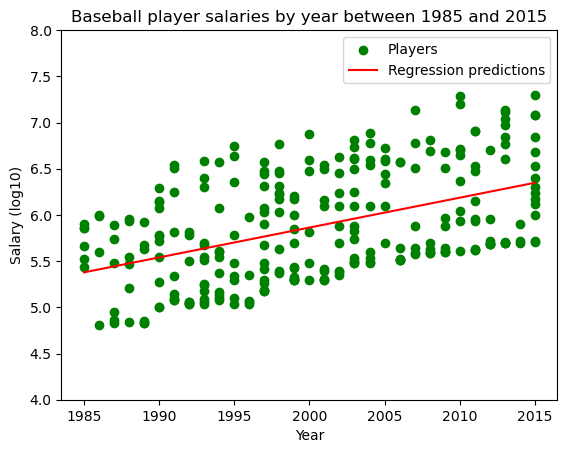

In [6]:
plt.scatter(year, sal, label=f'Players', color="green")

min_year = year.min()
max_year = year.max()

x = np.linspace(min_year, max_year, 2)
y = model.coef_[0] * x + model.intercept_
plt.plot(x, y, label=f'Regression predictions', color="red")
plt.ylim(4, 8)


plt.xlabel('Year')
plt.ylabel('Salary (log10)')
plt.title("Baseball player salaries by year between 1985 and 2015")

plt.legend()
plt.show()